<a href="https://colab.research.google.com/github/ShabnaIlmi/iris-project/blob/main/Iris_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Relevant Libraries**

In [121]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# **Loading and Exploring the Dataset**

## **Loading the Dataset**

In [122]:
# Loading the dataset using Scikit-learn
iris = load_iris()

In [123]:
# Displaying the first few rows of the dataset
iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **Exploratory Data Analysis**

In [124]:
# Displaying dataset information
print("Displaying iris data information")
iris_data.info()

Displaying iris data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [125]:
# Checking the basic statistic of the dataset (mean, min, max, etc.)
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Identifying categorical and numerical columns**

In [126]:
# Identifying categorical and numerical columns
categorical_featuress = iris_data.select_dtypes(include=['object']).columns
numerical_features = iris_data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [127]:
# List of categorical features
categorical_features = iris_data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(iris_data[categorical_features].dtypes)

Categorical Features:
- species

Data Type of Categorical Features:
species    object
dtype: object


**Unique values and their counts relevant to each categorical column**

In [128]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = iris_data[col].unique()
    value_counts = iris_data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
 


In [129]:
# Displaying the categorical columns which contain null values and their counts
found_nulls = False
for col in categorical_features:
    null_count = iris_data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")
        found_nulls = True

if not found_nulls:
    print("There are no null values in the categorical columns")

There are no null values in the categorical columns


In [130]:
# Displaying the categorical columns which contain 'Unknown' or 'N/A' values and their relevant counts
found_unknown_na = False

for col in categorical_features:
    unknown_count = (iris_data[col] == 'Unknown').sum()
    na_count = (iris_data[col] == 'N/A').sum()

    if unknown_count > 0 or na_count > 0:
        found_unknown_na = True
        if unknown_count > 0:
            print(f"{col} - 'Unknown': {unknown_count}")
        if na_count > 0:
            print(f"{col} - 'N/A': {na_count}")

if not found_unknown_na:
    print("There are no values with 'Unknown' or 'N/A' in the catgorical columns")

There are no values with 'Unknown' or 'N/A' in the catgorical columns


## **Numerical Features**

In [131]:
# Numerical Features
numerical_features = iris_data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


**Unique values and their count relevant to each numerical column**

In [132]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = iris_data[col].unique()
    value_counts = iris_data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

sepal_length
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64
 
sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
3.6     4
2.3     4
3.7     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64
 
petal_length
1.4    13
1.5    13
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.9     5
4.0     5
4.7     5
1.7     4
4.8     4
5.0     4
4.4     4
4.2     4
4.1     3
3.9     3
5.8     3
5.7     3
5.5     3
6.1     3
4.6     3
1.9     2
5.2     2
5.4     2
1.2     2
3.3     2

**Numerical columns with null values and
their relevant counts**

In [133]:
# Displaying the numerical columns with null values and their relevant counts
found_nulls = False

for col in numerical_features:
    null_count = iris_data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")
        found_nulls = True

if not found_nulls:
    print("There are no null values in the Numerical Columns.")

There are no null values in the Numerical Columns.


## **Visualizing the Distribution of the Target variable**


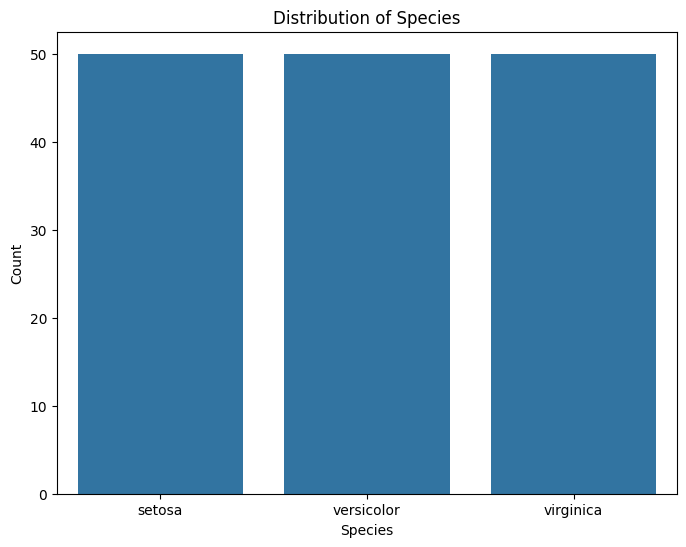

In [134]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=iris_data, x='species')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# **Data Preprocessing**

## **Data Cleaning**

In [135]:
# Step 1: Removing whitespaces from the object type columns
object_columns = iris_data.select_dtypes(include=['object']).columns
iris_data[object_columns] = iris_data[object_columns].apply(lambda x: x.str.strip())

In [136]:
# Step 2: Dropping duplicate values
iris_data.drop_duplicates(inplace=True)
iris_data.reset_index(drop=True, inplace=True)

In [137]:
# Display dataset information
print("\nDataset information after removing duplicates:")
iris_data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## **Categorical Columns**


## **Data Encoding**

In [138]:
# Step 3: Encoding the Categorical Columns using the label encoder
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Saving the encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

In [139]:
# Displaying first few rows of the dataset information
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Numerical Columns**

In [140]:
# Step 4: Scaling the numerical features
scaler = StandardScaler()
iris_data[numerical_features] = scaler.fit_transform(iris_data[numerical_features])

In [141]:
# Step 5: Seperating the features and the target variable
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [142]:
# Step 6: Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Building the Machine Learning Model**

## **Model based on Random Forest**

In [143]:
# Defining the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [144]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [145]:
# Setting up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [146]:
# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
# Displaying the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Getting the best model from the grid search
best_rf = grid_search.best_estimator_

In [ ]:
# Predicting on the test set
y_pred = best_rf.predict(X_test)

## **Evaluating the Model Performance**

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

## **Visualizing the Results**

In [ ]:
# Plotting the Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

## **Saving the Model for Future Use**

In [ ]:
# Saving the model for future use
joblib.dump(best_rf, 'iris_classification_model.pkl')